In [35]:
#### Time Series Analysis

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [36]:
dataset=pd.read_csv('AirPassengers.csv')
#parse string to dataset
dataset['Month'] =  pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Month'])

In [37]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


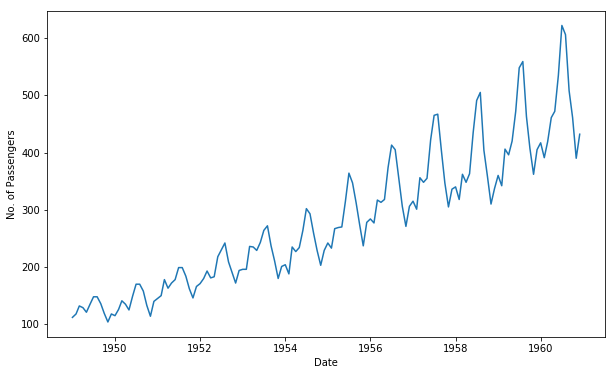

In [38]:
#plot graph
plt.xlabel('Date')
plt.ylabel('No. of Passengers')
plt.plot(indexedDataset)

In [39]:
#data is not stationary cause mean of 50-52 is differnt than 58-60
#we have two method to check whether the data is stationary or not (rolling and ADCF)
#determining rolling statistics
rolmean=indexedDataset.rolling(window=12).mean()  #win=12  yearly mean
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

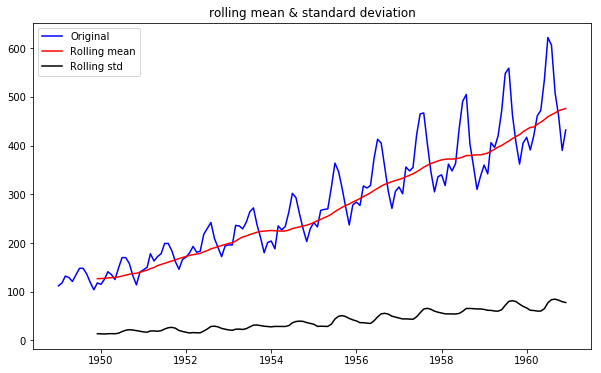

In [40]:
#plotting rolling statistics
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('rolling mean & standard deviation')
plt.show(block=False)

In [41]:
#performing ADCF (dickey-fuller) test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest=adfuller(indexedDataset['#Passengers'],autolag='AIC')
#AIC= akaike information criteria

dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of Observation used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of Observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


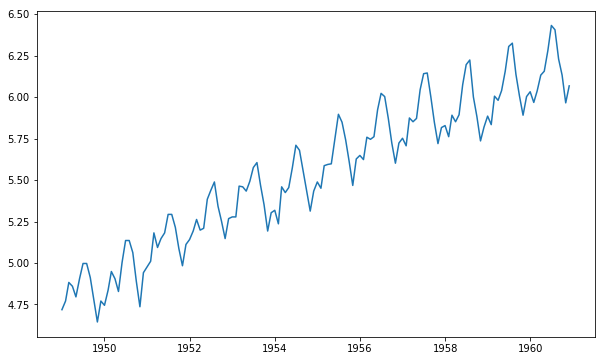

In [42]:
#data is not stationary cause p-value is high.. it must be somewhere 0.5 


#estimating trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

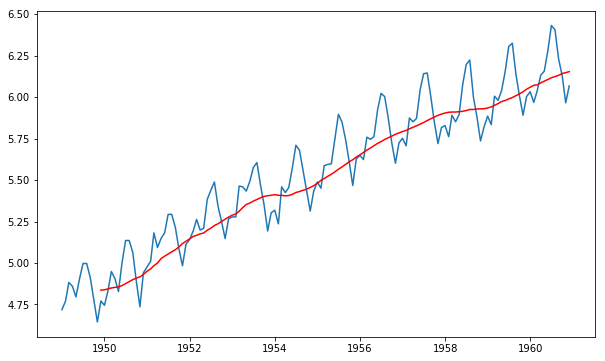

In [43]:
#moving avg and std

movingavg=indexedDataset_logScale.rolling(window=12).mean()
movingstd=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingavg,color='red')

In [44]:
#somewhat better than previous one but still not stationary.. mean is moving with time

#take difference bw movingavg and actual number of passenger
datasetlogScaleMinusmovingavg=indexedDataset_logScale-movingavg
datasetlogScaleMinusmovingavg.head(12)

#remove non values
datasetlogScaleMinusmovingavg.dropna(inplace=True)
datasetlogScaleMinusmovingavg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [45]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #determining rolling statistics
    rolmean=timeseries.rolling(window=12).mean()  #win=12  yearly mean
    rolstd=timeseries.rolling(window=12).std()
    
    #plotting rolling statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling mean')
    std=plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean & standard deviation')
    plt.show(block=False)
    
    #performing ADCF (dickey-fuller) test:
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
    #AIC= akaike information criteria

    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of Observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    
    print(dfoutput)

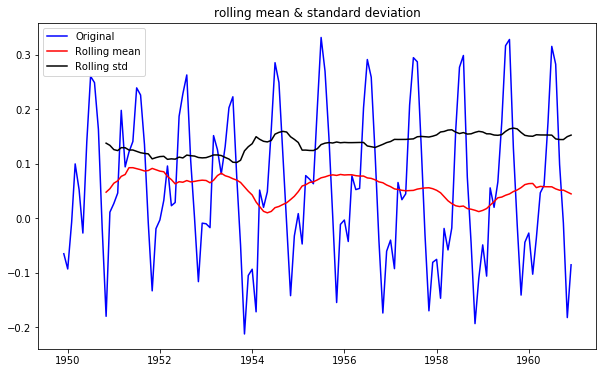

Results of Dickey-Fuller Test:
Test Statistic                 -3.162908
p-value                         0.022235
#Lags used                     13.000000
Number of Observation used    119.000000
Critical value (1%)            -3.486535
Critical value (5%)            -2.886151
Critical value (10%)           -2.579896
dtype: float64


In [46]:
test_stationary(datasetlogScaleMinusmovingavg)

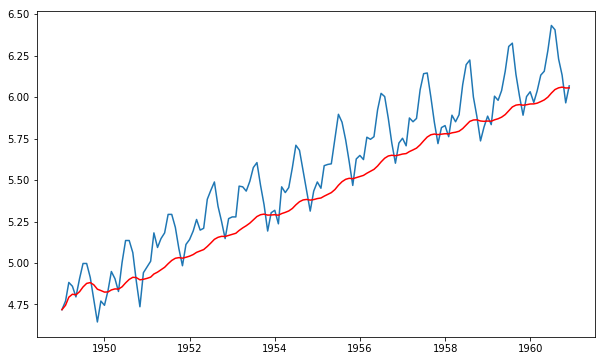

In [47]:
exponentialWeightedAvg=indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialWeightedAvg,color='red')

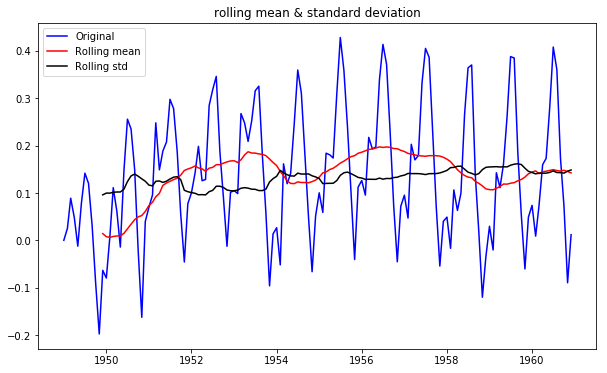

Results of Dickey-Fuller Test:
Test Statistic                 -3.601262
p-value                         0.005737
#Lags used                     13.000000
Number of Observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [48]:
#avg is also up tred and it's not staitonary
datasetmovingExponentialAvg=indexedDataset_logScale-exponentialWeightedAvg
test_stationary(datasetmovingExponentialAvg)

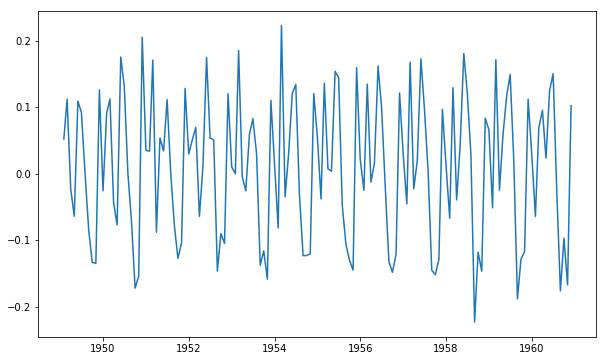

In [49]:
#data is stationary

#shfting values in time series so we can use it in forecasting
datasetlogDiffshifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetlogDiffshifting)

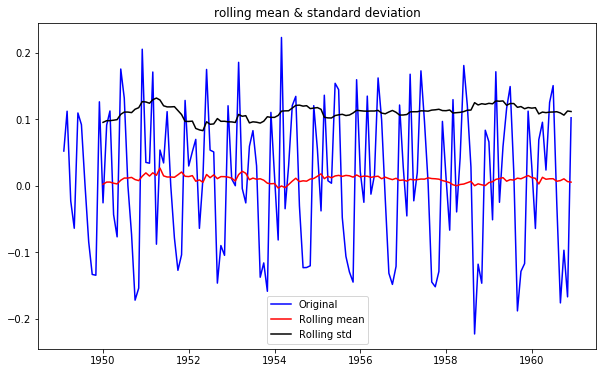

Results of Dickey-Fuller Test:
Test Statistic                 -2.717131
p-value                         0.071121
#Lags used                     14.000000
Number of Observation used    128.000000
Critical value (1%)            -3.482501
Critical value (5%)            -2.884398
Critical value (10%)           -2.578960
dtype: float64


In [50]:
datasetlogDiffshifting.dropna(inplace=True)
test_stationary(datasetlogDiffshifting)

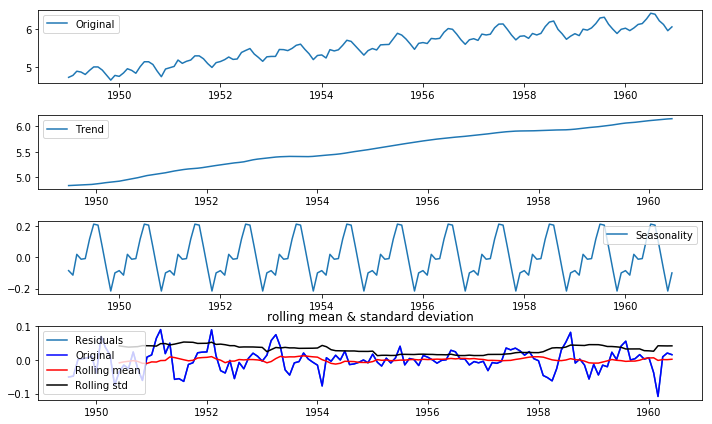

Results of Dickey-Fuller Test:
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags used                    9.000000e+00
Number of Observation used    1.220000e+02
Critical value (1%)          -3.485122e+00
Critical value (5%)          -2.885538e+00
Critical value (10%)         -2.579569e+00
dtype: float64


In [51]:
#component of timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

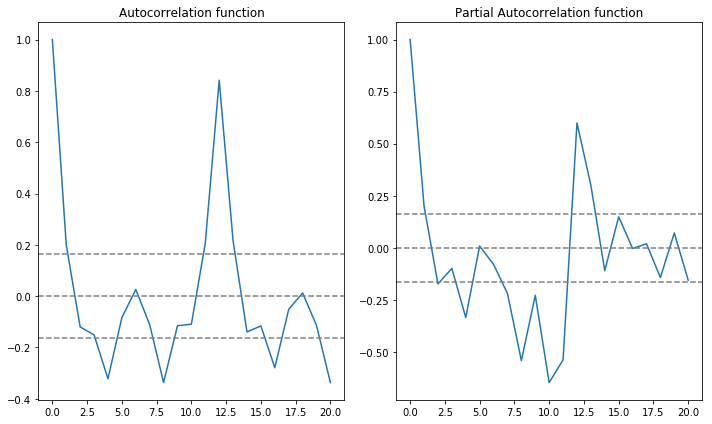

In [52]:
#ACF and PACF plots
#for calculate value of p we need to plot PACF graph and for q ACG plot

from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(datasetlogDiffshifting,nlags=20)
lag_pacf=pacf(datasetlogDiffshifting,nlags=20,method='ols') #ordinary list square method

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffshifting)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffshifting)),linestyle='--',color='grey')
plt.title('Autocorrelation function')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffshifting)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffshifting)),linestyle='--',color='grey')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

Text(0.5, 1.0, 'RSS: 1.0292')

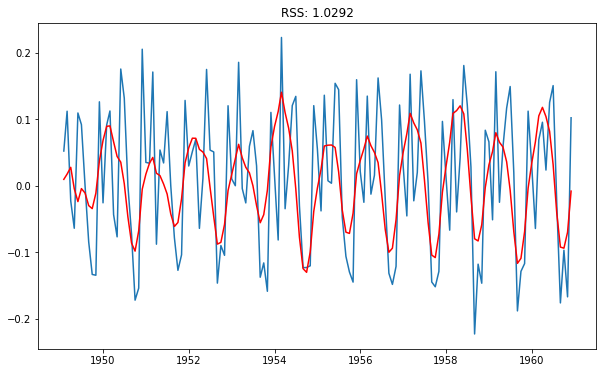

In [60]:
#ARIMA model

from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(indexedDataset_logScale,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetlogDiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogDiffshifting['#Passengers'])**2))


In [61]:
predictions_arima_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_arima_diff)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
1949-12-01    0.037212
1950-01-01    0.068135
1950-02-01    0.089434
1950-03-01    0.090029
1950-04-01    0.066152
1950-05-01    0.044053
1950-06-01    0.035467
1950-07-01    0.003100
1950-08-01   -0.047127
1950-09-01   -0.086353
1950-10-01   -0.098465
1950-11-01   -0.067846
1950-12-01   -0.005228
1951-01-01    0.017385
1951-02-01    0.034016
1951-03-01    0.042561
1951-04-01    0.018748
1951-05-01    0.015260
1951-06-01    0.002489
1951-07-01   -0.012408
                ...   
1958-07-01    0.054477
1958-08-01   -0.016466
1958-09-01   -0.079842
1958-10-01   -0.083143
1958-11-01   -0.058870
1958-12-01   -0.002663
1959-01-01    0.031199
1959-02-01    0.051445
1959-03-01    0.079807
1959-04-01    0.065334
1959-05-01    0.058190
1959-06-01    0.036075
1959-

In [62]:
#convert to cumulative sum
predictions_arima_diff_cumsum=predictions_arima_diff.cumsum()
print(predictions_arima_diff_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220143
1950-04-01    0.286294
1950-05-01    0.330348
1950-06-01    0.365815
1950-07-01    0.368915
1950-08-01    0.321788
1950-09-01    0.235435
1950-10-01    0.136970
1950-11-01    0.069124
1950-12-01    0.063896
1951-01-01    0.081281
1951-02-01    0.115297
1951-03-01    0.157858
1951-04-01    0.176606
1951-05-01    0.191865
1951-06-01    0.194354
1951-07-01    0.181946
                ...   
1958-07-01    1.166557
1958-08-01    1.150091
1958-09-01    1.070249
1958-10-01    0.987106
1958-11-01    0.928237
1958-12-01    0.925574
1959-01-01    0.956773
1959-02-01    1.008219
1959-03-01    1.088025
1959-04-01    1.153360
1959-05-01    1.211550
1959-06-01    1.247624
1959-

In [68]:
predictions_arima_log=pd.Series(indexedDataset_logScale['#Passengers'].iloc[0],index=indexedDataset_logScale.index)
predictions_arima_log=predictions_arima_log.add(predictions_arima_diff_cumsum,fill_value=0)
predictions_arima_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

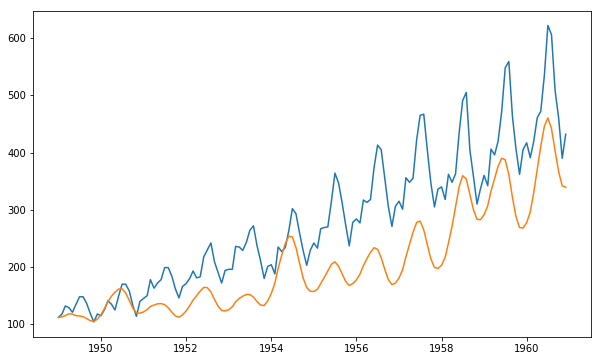

In [70]:
#data transformation
predictions_arima=np.exp(predictions_arima_log)
plt.plot(indexedDataset)
plt.plot(predictions_arima)

In [71]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


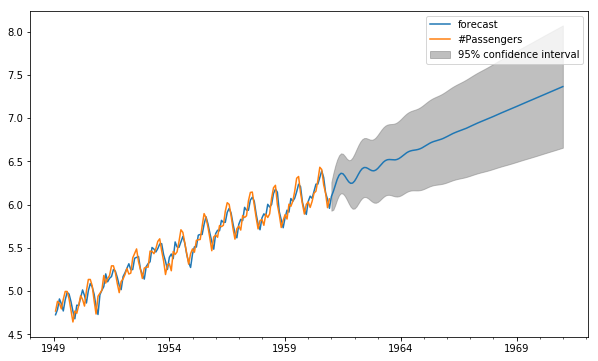

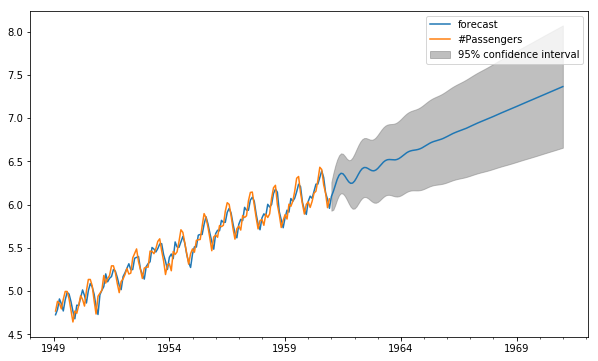

In [78]:
results_ARIMA.plot_predict(1,264)
#results_ARIMA.forecast(steps=120)